In [6]:

import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor


df = pd.read_csv('C:\\Users\\WineQualityReds.csv') # Load the data
df.head()


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:

# The target variable is 'quality'.
X = df[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density','pH', 'sulphates', 'alcohol']]
Y = df['quality']

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)


RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

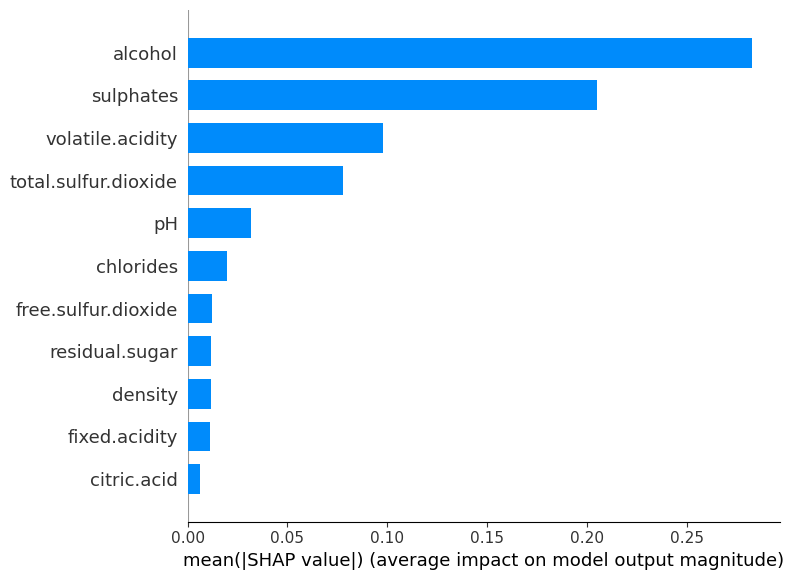

In [10]:

# so, we know that the independent values, X, contribute to the overall outcome of the dependent variable, y.
# this step helps us understand how a ML model works, transparently! this helps us interpret the ML process!

import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


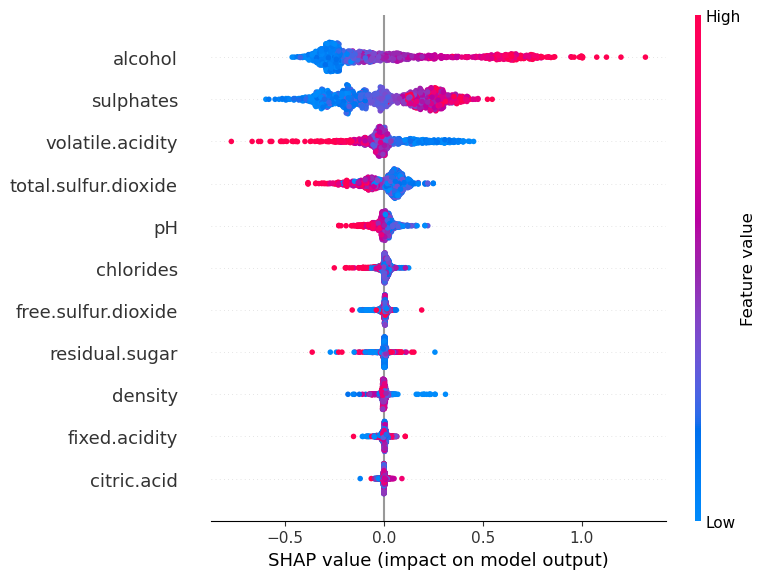

In [22]:

# the chart below illustrates the following...
# 1)Feature importance: Variables are ranked in descending order
# 2)Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
# 3)Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
# 4)Correlation: A high level of the “alcohol” content has a high and positive impact on the quality rating. 
# The “high” comes from the red color, and the “positive” impact is shown on the X-axis. Similarly, we will 
# say the “volatile acidity” is negatively correlated with the target variable.
        
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)


In [ ]:

# How is this similar to feature importance?
# SHAP values estimate the impact of a feature on predictions whereas feature importance estimate the impact 
# of a feature on model fit!
